# **DSP ICE3**

Please read all instructions, provide detailed comments and include all relevant plots

Start the computer, and load matrix, plot, and sound file import tools

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
from IPython.display import Audio

We need the unit step function from Signals and Systems

In [ ]:
u = lambda t : np.heaviside(t, 1)

# PART 0 / Horizontal axis in DFT plots

Understanding the horizontal axis. Read the following mathematical operations and try to explain what is being done

In [ ]:
N = 5

# Option1
nvals1 = np.arange(N)
print(nvals1)

# Option2
nsvals2 = np.fft.fftfreq(N, 1/N)
nsvals2 = nsvals2.astype(np.int32)  # Convert to integer for nicer print
print(nsvals2)

[0 1 2 3 4]
[ 0  1  2 -2 -1]


Are these two sets of indices the same modul $N$ or not ? Explain:



In [ ]:
nsvals1 = np.fft.fftshift(nvals1)
print(nsvals1)

nsvals2 = np.fft.fftshift(nsvals2)
print(nsvals2)


[3 4 0 1 2]
[-2 -1  0  1  2]


What is the effect of the above $\texttt{fftshift}$ operation ? Explain:

In [ ]:
fs = 200 # Sampling freq 200 Hz
fvals = nsvals2 / N * fs
print(fvals)

[-80. -40.   0.  40.  80.]


Where will you use these frequencies (Hz) in a DFT plot ?

# PART 1


Generate the following 3 types of sound signals, and do frequency analysis for all

Sound1: DC + Single frequency

Sound2: DC + Two seperate frequencies (Start and end at the same time, amplitudes must be different)

Sound3: DC + Two seperate frequencies (Start and end at different times, amplitudes must be different)

Do not choose tones/frequencies above 1000 Hz. Note that the DC value cannot be heard 😞 but can be viewed in DFT plots


Plot different portions of the sound signals.

Do not plot the whole signal, just plot the relevant portions to illustrate single and multiple frequency regions.

Generate DFT plots for all cases. Include your comments.


In [ ]:
# Create a sound
fs = 4000
duration = 3
t = np.linspace(0, duration, fs*duration)

note1 = np.sin(2*np.pi*311.13*t ) * (u(t - 0) - u(t - 5))
x = 0.3 + note1

In [ ]:
# Generate a player for mono sound
Audio(x, rate=fs)

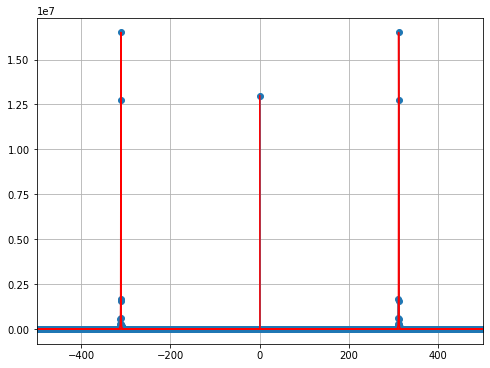

In [ ]:
# Write your DFT code here
X = np.fft.fft(x, n = 1 * len(x))
freq = np.fft.fftfreq(len(X)) * fs
plt.figure(figsize=(8,6))
plt.stem(freq, np.abs(X)**2)
plt.plot(freq, np.abs(X)**2,'r-')
plt.grid()
plt.xlim([-500,500])
plt.show()

In [ ]:
note2 = np.cos(2*np.pi*415.30*t + 1.0) * (u(t - 0) - u(t - 5))
x = 0.3 + note1 + note2
Audio(x, rate=fs)

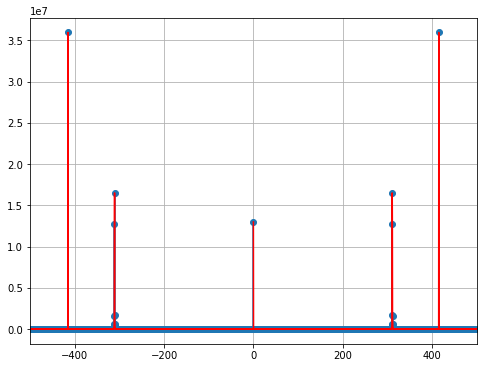

In [ ]:
X = np.fft.fft(x, n = 1 * len(x))
freq = np.fft.fftfreq(len(X)) * fs
plt.figure(figsize=(8,6))
plt.stem(freq, np.abs(X)**2)
plt.plot(freq, np.abs(X)**2,'r-')
plt.grid()
plt.xlim([-500,500])
plt.show()

In [ ]:
note3 = np.cos(2*np.pi*415.30*t + 1.0) * (u(t - 1) - u(t - 2))
x = 0.3 + note1 + note3
Audio(x, rate=fs)

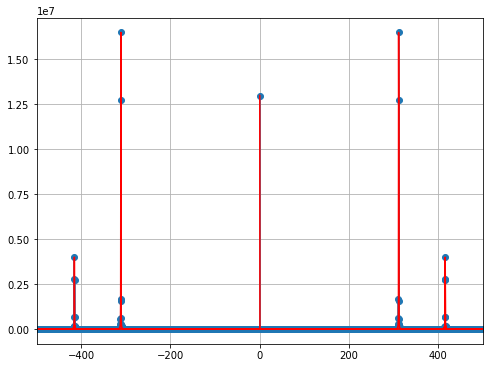

In [ ]:
X = np.fft.fft(x, n = 1 * len(x))
freq = np.fft.fftfreq(len(X)) * fs
plt.figure(figsize=(8,6))
plt.stem(freq, np.abs(X)**2)
plt.plot(freq, np.abs(X)**2,'r-')
plt.grid()
plt.xlim([-500,500])
plt.show()

# PART2/Filtering

In [ ]:
x = 0.3 + note1 + note2
N = len(x)
y = 0 * x

for k in range(1, N):
  y[k] = 0.8 * y[k-1] + 0.2 * x[k]

x = 1.0 * y

What is the effect of the above code ? Explain:

Run this code at least 5 times, and after each run, play back the audio and generate the DFT plot. Summarize your observations

Each time you run this code, $x$ will be updated. To restart, restart the virtual machine.

In [ ]:
# Generate a player for mono sound
Audio(x, rate=fs)

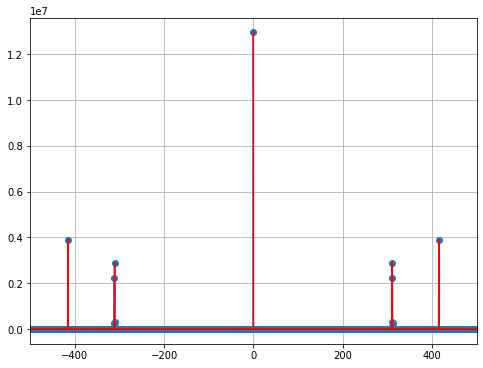

In [ ]:
# Write your DFT code here
X = np.fft.fft(x, n = 1 * len(x))
freq = np.fft.fftfreq(len(X)) * fs
plt.figure(figsize=(8,6))
plt.stem(freq, np.abs(X)**2)
plt.plot(freq, np.abs(X)**2,'r-')
plt.grid()
plt.xlim([-500,500])
plt.show()

# PART 2b / Advanced Filtering

What is the transfer function of our first order filter?

If we apply this 1st order filter 2 times, what will be the equivalent transfer function and the difference equation ? Note that this will be a higher order difference equation and you need to find all coefficients.

Compute the attenuation of non-DC frequencies theoretically, and compare with what you observe in DFT plots?

Your comments/calculations/analysis:

.

.

.

.

.

.